Creating a dataset 

In [1]:
# importing libraries 
import numpy as np 
import pandas as pd

In [3]:
np.random.seed(42)
X = np.linspace(-10,10,100)
noise = np.random.normal(0,10,X.shape)
Y = 3*X**2 + 2*X + 1 +noise

In [9]:
# convert to dataframe
df=pd.DataFrame({'X':X,'Y':Y})

In [10]:
df.head()

,X,Y
0,-10.000000,285.967142
1,-9.797980,268.022622
2,-9.595960,264.532288
3,-9.393939,262.180712
4,-9.191919,233.748763


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
# transform data
from sklearn.preprocessing import PolynomialFeatures
X_train = X_train.reshape(-1, 1)  # Convert to shape (n_samples, 1)
X_test = X_test.reshape(-1, 1)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [14]:
# train the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_poly,Y_train)

LinearRegression()

In [15]:
# make predictions
y_pred=lr.predict(X_test_poly)

In [16]:
y_pred

array([ 1.51320337e+02,  2.14064007e+00,  5.94521425e+01, -1.92683207e-01,
        6.24307183e-01,  8.40477847e+00,  8.09291885e+01,  1.26424465e+02,
        1.74990914e+02,  2.80476160e+02,  1.08341210e+02,  3.79308080e+01,
        7.69569758e+01,  2.58714865e+01,  2.18033583e+02,  2.35325646e+02,
        9.66791206e+01,  1.03745905e+02,  1.56850280e+02,  3.36646662e+01])

In [18]:
Y_test

array([146.75699785,  10.03075126,  64.35071761,  -5.53728506,
       -12.30373842,  12.22481071,  83.15676353, 125.02305461,
       171.43775451, 285.96714153, 100.68008982,  33.66061983,
        93.75693549,  17.08955738, 219.16085814, 233.74876316,
        98.55856373, 101.7136302 , 160.4444161 ,  53.95192173])

In [19]:
from sklearn.metrics import r2_score
print("R2 Score:", r2_score(Y_test, y_pred))

R2 Score: 0.9906669745006149


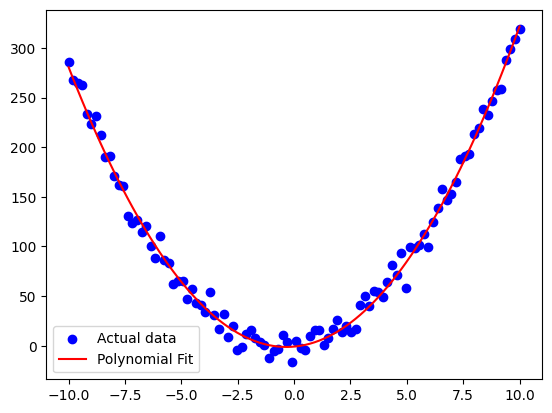

In [21]:
# visualize
import matplotlib.pyplot as plt
plt.scatter(X,Y,color='blue',label='Actual data')
X_sorted = np.sort(X, axis=0).reshape(-1, 1)  # Reshape into 2D array
Y_pred_full = lr.predict(poly.transform(X_sorted))
plt.plot(X_sorted, Y_pred_full, color='red', label='Polynomial Fit')
plt.legend()
plt.show()